In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
df = pd.read_csv("/home/matteo/Scrivania/plot_result_example.csv")
#df = pd.read_csv("/home/matteo/Scrivania/ML2SQL_results/HEART_DISEASE_times_final.csv")
df.head(20)

,Example,Framework,Output method,1,10,100,1000,10000,100000,ALL
0,HeartDisease,ML.NET,NO OUTPUT,1175.0000,135.0000,39.0000,26.0000,NaN,NaN,26.0000
1,HeartDisease,ML.NET,CONSOLE,1315.0000,158.0000,44.0000,28.0000,NaN,NaN,28.0000
2,HeartDisease,ML.NET,in CSV out DB,2228.0000,191.0000,52.0000,32.0000,NaN,NaN,32.0000
3,HeartDisease,ML.NET,DB,2006.0000,232.0000,57.0000,37.0000,NaN,NaN,37.0000
4,HeartDisease,ML.NET,FILE CSV,1377.0000,143.0000,41.0000,29.0000,NaN,NaN,29.0000
5,HeartDisease,ML2SQL,NO OUTPUT,890.0000,100.0000,20.0000,1.0000,NaN,NaN,1.0000
6,HeartDisease,ML2SQL,CONSOLE,3060.0000,380.0000,140.0000,100.0000,NaN,NaN,100.0000
7,HeartDisease,ML2SQL,DB,2820.0000,400.0000,130.0000,110.0000,NaN,NaN,110.0000
8,HeartDisease,ML2SQL,FILE CSV,2652.0000,411.0000,161.0000,134.0000,NaN,NaN,134.0000
9,HeartDisease,Sklearn,NO OUTPUT,477.8919,51.1215,9.5053,3.1967,NaN,NaN,5.9912


In [11]:
df.dtypes

Example           object
Framework         object
Output method     object
1                float64
10               float64
100              float64
1000             float64
10000            float64
100000           float64
ALL              float64
dtype: object

In [12]:
# impose an ordering
df = pd.concat([df[df["Framework"]!="ML2SQL"], df[df["Framework"]=="ML2SQL"]], axis=0)
df.head(30)

,Example,Framework,Output method,1,10,100,1000,10000,100000,ALL
0,HeartDisease,ML.NET,NO OUTPUT,1175.0000,135.0000,39.0000,26.0000,NaN,NaN,26.0000
1,HeartDisease,ML.NET,CONSOLE,1315.0000,158.0000,44.0000,28.0000,NaN,NaN,28.0000
2,HeartDisease,ML.NET,in CSV out DB,2228.0000,191.0000,52.0000,32.0000,NaN,NaN,32.0000
3,HeartDisease,ML.NET,DB,2006.0000,232.0000,57.0000,37.0000,NaN,NaN,37.0000
4,HeartDisease,ML.NET,FILE CSV,1377.0000,143.0000,41.0000,29.0000,NaN,NaN,29.0000
9,HeartDisease,Sklearn,NO OUTPUT,477.8919,51.1215,9.5053,3.1967,NaN,NaN,5.9912
10,HeartDisease,Sklearn,CONSOLE,558.1338,52.1970,7.4704,3.2215,NaN,NaN,5.3406
11,HeartDisease,Sklearn,in CSV out DB,12355.1714,1270.2875,160.4302,48.1021,NaN,NaN,43.3531
12,HeartDisease,Sklearn,DB,2620.0000,200.0000,100.0000,50.0000,NaN,NaN,40.0000
13,HeartDisease,Sklearn,FILE CSV,755.0218,89.6778,20.3063,14.0193,NaN,NaN,3.3262


## DB EFFICIENCY

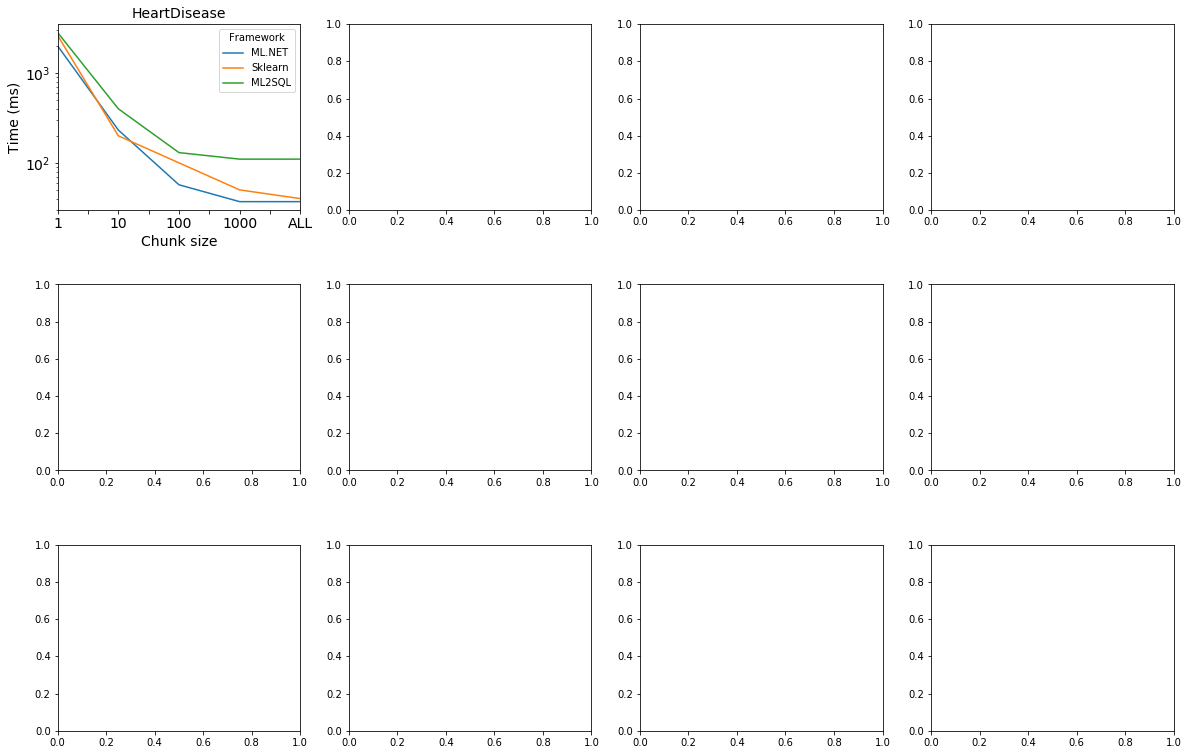

In [146]:
db_out_method = "in DB out DB"
df_db = df[(df["Output method"]==db_out_method) | (df["Output method"]=="DB")]

unique_examples = df_db["Example"].unique()

nrows = 3
ncols = 4        
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20, 13)
for row in range(nrows):
    for col in range(ncols):
        unique_example_index = row*ncols + col
        if unique_example_index < len(unique_examples):
            example = unique_examples[unique_example_index]
            df_example = df_db[df_db["Example"]==example]
            formatted_df = df_example[["Framework", "1", "10", "100", "1000", "ALL"]]            
            formatted_df.set_index("Framework", inplace=True)
            formatted_df = formatted_df.T
            formatted_df = formatted_df.fillna(100)
            axes[row][col].set_title(example, fontsize=14)
            axes[row][col].set_xlabel("Chunk size", fontsize=14)
            axes[row][col].set_ylabel("Time (ms)", fontsize=14)
            #formatted_df.plot.bar(ax=axes[row][col], logy=True, fontsize=14)
            formatted_df.plot(ax=axes[row][col], logy=True, fontsize=14)
#fig.suptitle("DB efficiency")
plt.subplots_adjust(hspace=0.4)

In [147]:
fig.savefig('db_efficiency.png')

## DB vs other output modalities

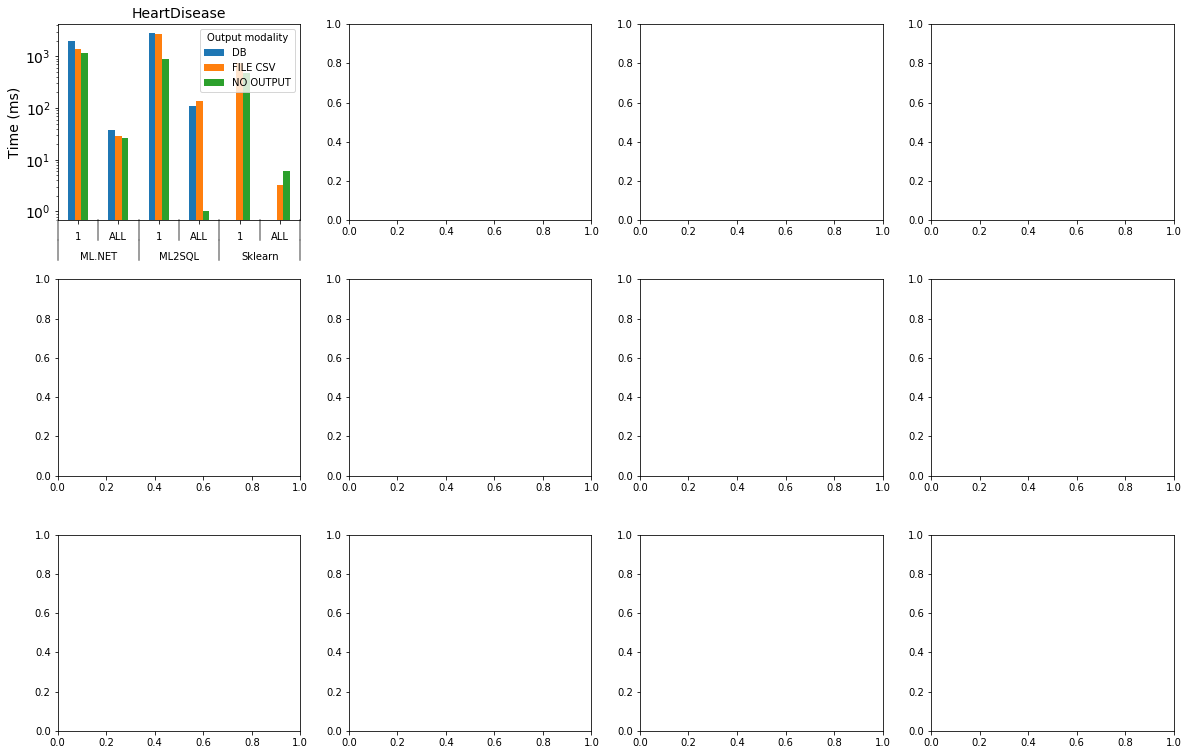

In [132]:
def add_line(ax, xpos, ypos):
    line = plt.Line2D([xpos, xpos], [ypos + .1, ypos],
                      transform=ax.transAxes, color='gray')
    line.set_clip_on(False)
    ax.add_line(line)

def label_len(my_index,level):
    labels = my_index.get_level_values(level)
    return [(k, sum(1 for i in g)) for k,g in groupby(labels)]

def label_group_bar_table(ax, df):
    ypos = -.1
    scale = 1./df.index.size
    for level in range(df.index.nlevels)[::-1]:
        pos = 0
        for label, rpos in label_len(df.index,level):
            lxpos = (pos + .5 * rpos)*scale
            ax.text(lxpos, ypos, label, ha='center', transform=ax.transAxes)
            add_line(ax, pos*scale, ypos)
            pos += rpos
        add_line(ax, pos*scale , ypos)
        ypos -= .1


unique_examples = df_db["Example"].unique()

frameworks = ["ML.NET", "Sklearn", "ML2SQL"]
chunk_sizes = ["1", "ALL"]
output_modalities = ["DB", "NO OUTPUT", "FILE CSV"]
multi_index = pd.MultiIndex.from_product(
    [frameworks, chunk_sizes, output_modalities], 
   names=['Framework', 'Chunk size', 'Output modality']
)
df = df.fillna(100)

nrows = 3
ncols = 4        
fig, axes = plt.subplots(nrows=nrows, ncols=ncols)
fig.set_size_inches(20, 13)
for row in range(nrows):
    for col in range(ncols):
        unique_example_index = row*ncols + col
        if unique_example_index < len(unique_examples):
            example = unique_examples[unique_example_index]
            df_example = df[df["Example"]==example]
            
            values = []
            for framework in frameworks:
                df_ex_frame = df_example[df_example["Framework"]==framework]
                
                for chunk_size in chunk_sizes:
                    df_ex_frame_size = df_ex_frame[["Output method", chunk_size]]
                    
                    for out_mode in output_modalities:
                        df_ex_frame_size_out_mode = df_ex_frame_size[df_ex_frame_size["Output method"]==out_mode]
                        val = df_ex_frame_size_out_mode[chunk_size].values[0]
                        values.append(val)
                        
            data = pd.DataFrame(data={'val': values}, index=multi_index)
            # unstack last level to plot two separate columns
            data = data.unstack(level=-1)
            data['val'].plot(kind='bar', ax=axes[row][col], logy=True, fontsize=14)
            axes[row][col].set_title(example, fontsize=14)
            axes[row][col].set_ylabel("Time (ms)", fontsize=14)
            #Below 2 lines remove default labels
            axes[row][col].set_xticklabels('')
            axes[row][col].set_xlabel('')
            label_group_bar_table(axes[row][col], data)
plt.subplots_adjust(hspace=0.3)
#fig.suptitle("DB vs other output modalities")

In [133]:
fig.savefig('db_vs_other_output.png')